# **Import Libraries and load data**

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


warnings.filterwarnings("ignore")


df_test=pd.read_csv("/kaggle/input/wind-turbine-power-generation-forecasting/column_info.csv")
df_train=pd.read_csv("/kaggle/input/wind-turbine-power-generation-forecasting/Train.csv")
df_column_info=pd.read_csv("/kaggle/input/wind-turbine-power-generation-forecasting/column_info.csv")
print("Test Dataset:")
print(df_test.head())
print("\nTest Dataset Null Value:")
print(df_test.isnull().sum())

print("\nTrain Dataset:")
print(df_train.head())
print("\nTrain Dataset Null Value:")
print(df_train.isnull().sum())

print("\nColumn Info Dataset:")
print(df_column_info.head())


Test Dataset:
  Variables Description                                 Unnamed: 1
0                  Time                         Readings timestamp
1               Temp_2m        Temperature at 2 mtrs above surface
2             RelHum_2m  Relative Humidity at 2 mtrs above surface
3                 DP_2m          Dew Point at 3 mtrs above surface
4                WS_10m        Wind Speed at 10 mtrs above surface

Test Dataset Null Value:
Variables Description    0
Unnamed: 1               0
dtype: int64

Train Dataset:
   Unnamed: 0              Time  Location  Temp_2m  RelHum_2m      DP_2m  \
0           0  02-01-2013 00:00         1  28.2796  84.664205  24.072595   
1           1  02-01-2013 01:00         1  28.1796  85.664205  24.272595   
2           2  02-01-2013 02:00         1  26.5796  90.664205  24.072595   
3           3  02-01-2013 03:00         1  27.1796  87.664205  23.872595   
4           4  02-01-2013 04:00         1  27.0796  87.664205  23.672595   

     WS_10m   WS_1

In [2]:
df_column_info.columns = ['Variable', 'Description']
df_column_info.head()
df_train['Time'] = pd.to_datetime(df_train['Time'], format='%d-%m-%Y %H:%M')
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_train.columns = df_train.columns.str.strip()

In [3]:
print("\nTrain Dataset Info:")
print(df_train.info())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       140160 non-null  datetime64[ns]
 1   Location   140160 non-null  int64         
 2   Temp_2m    140160 non-null  float64       
 3   RelHum_2m  140160 non-null  float64       
 4   DP_2m      140160 non-null  float64       
 5   WS_10m     140160 non-null  float64       
 6   WS_100m    140160 non-null  float64       
 7   WD_10m     140160 non-null  float64       
 8   WD_100m    140160 non-null  float64       
 9   WG_10m     140160 non-null  float64       
 10  Power      140160 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 11.8 MB
None


# **EDA**

In [4]:
print("\nTrain Dataset Summary Statistics:")
print(df_train.describe())




Train Dataset Summary Statistics:
                                Time       Location        Temp_2m  \
count                         140160  140160.000000  140160.000000   
mean   2015-01-01 23:29:59.999999744       2.500000      45.912162   
min              2013-01-02 00:00:00       1.000000     -31.420400   
25%              2014-01-01 23:45:00       1.750000      29.579600   
50%              2015-01-01 23:30:00       2.500000      45.879600   
75%              2016-01-01 23:15:00       3.250000      64.579600   
max              2016-12-31 23:00:00       4.000000      94.479600   
std                              NaN       1.118038      21.930554   

           RelHum_2m          DP_2m         WS_10m        WS_100m  \
count  140160.000000  140160.000000  140160.000000  140160.000000   
mean       70.420512      35.867228       4.352948       6.924278   
min         8.664205     -36.627405       0.165389       0.007799   
25%        57.664205      21.172595       2.815389       4

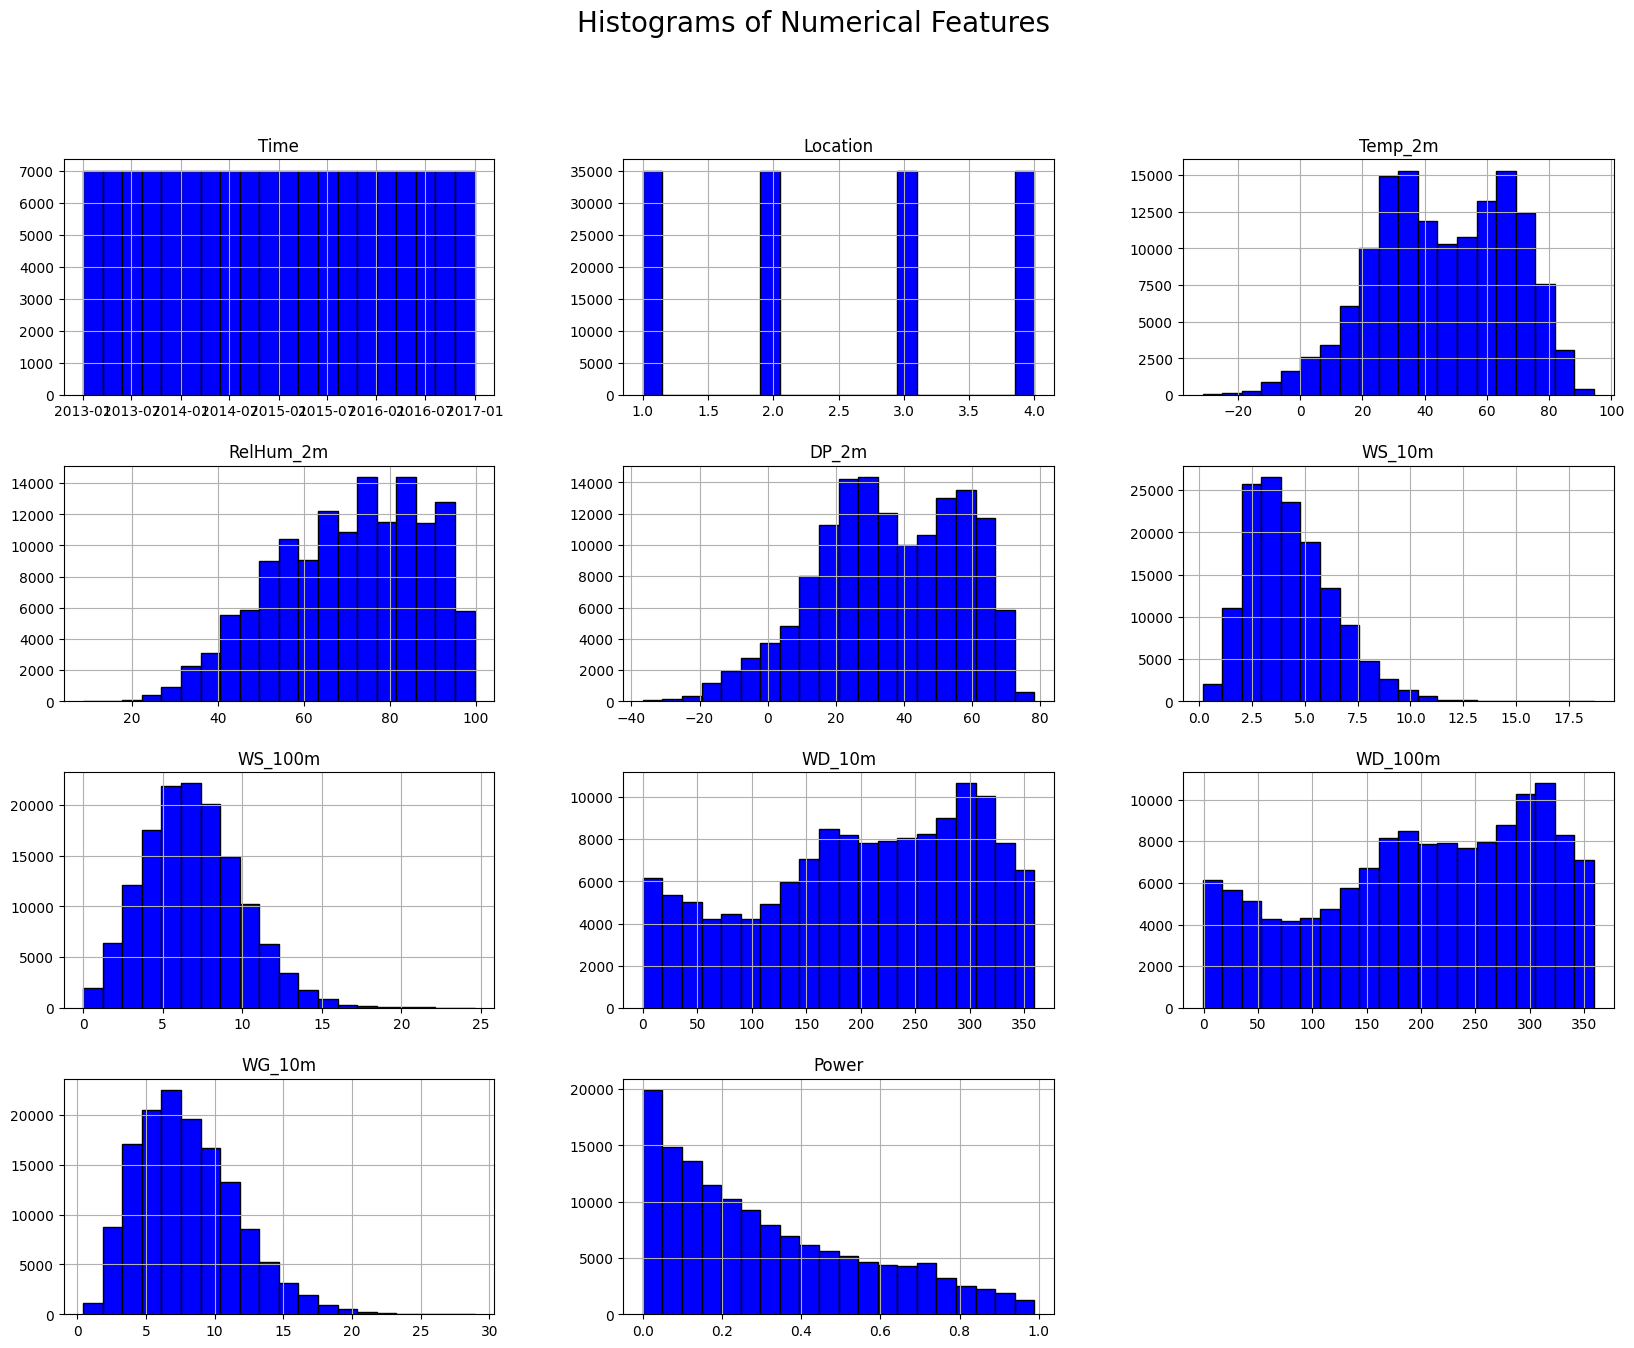

In [5]:
df_train.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', size=20)
plt.show()



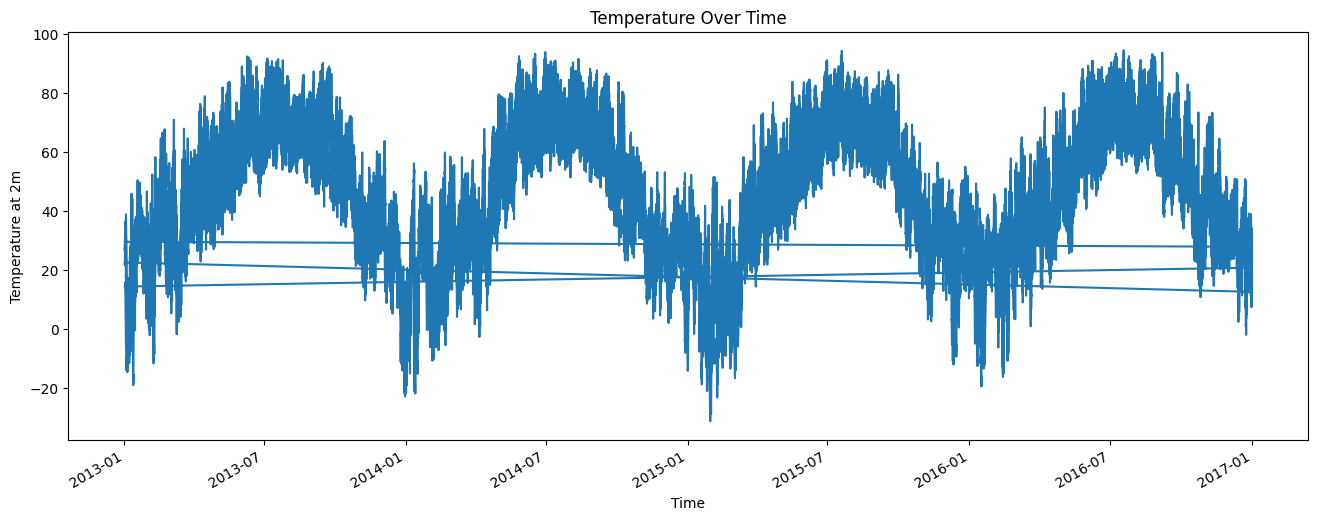

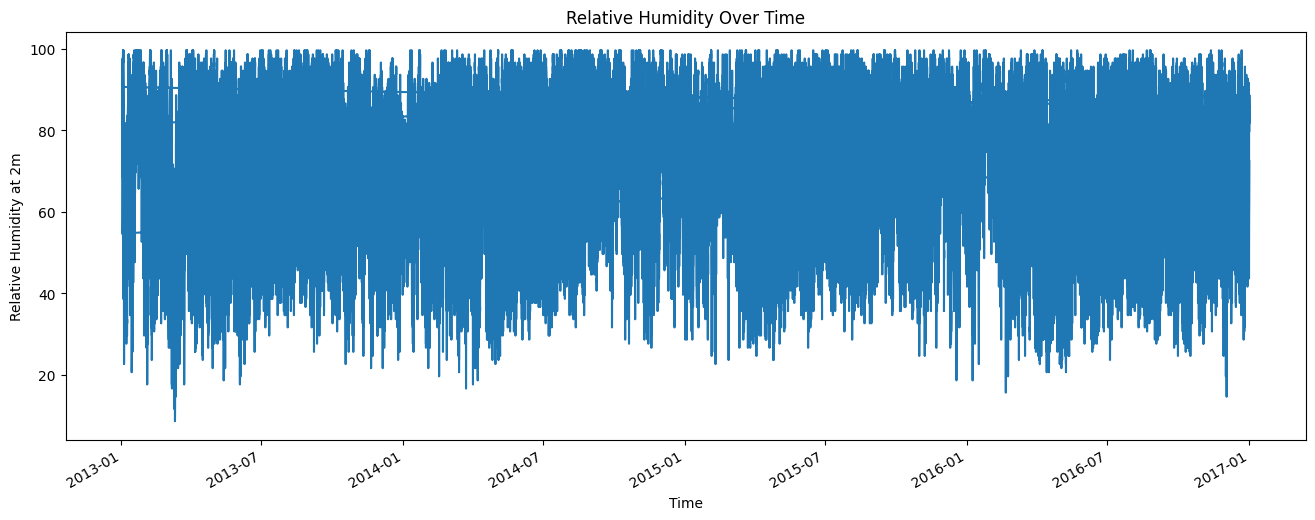

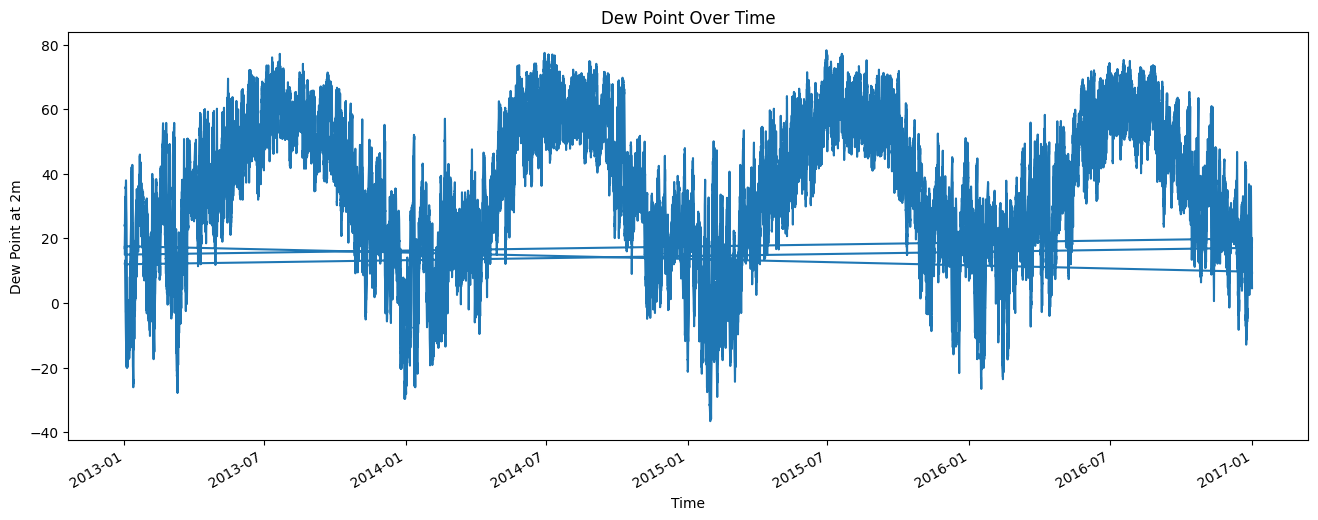

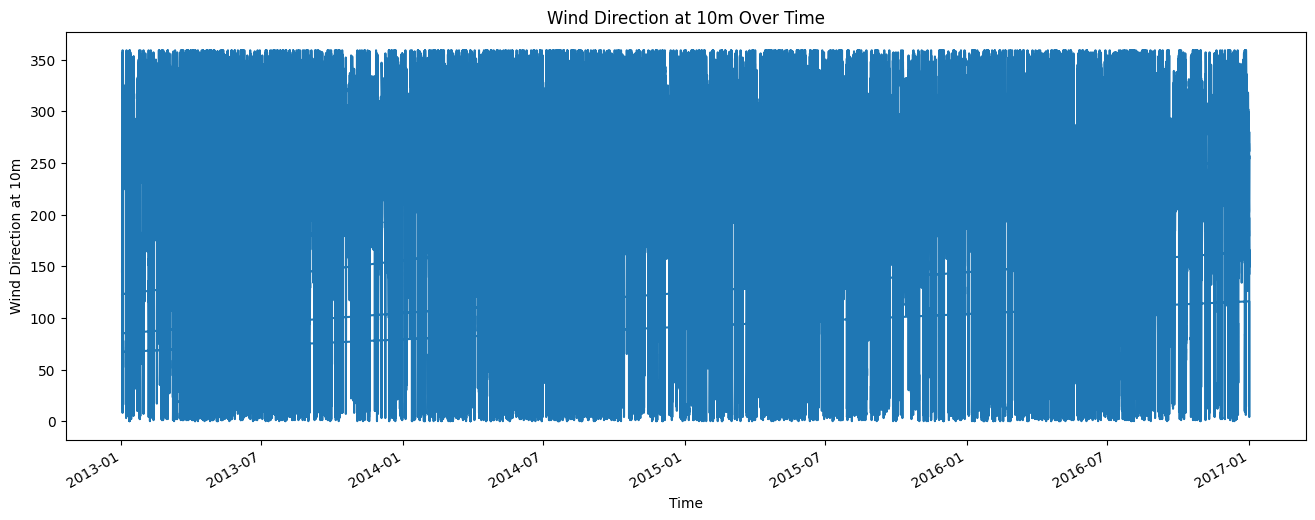

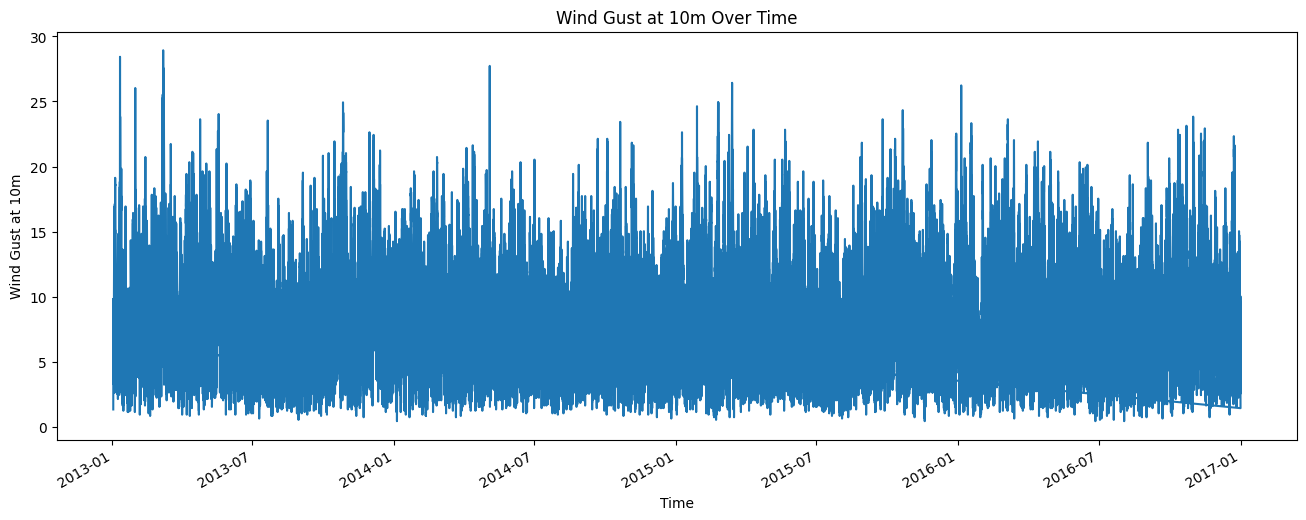

In [6]:
plt.figure(figsize=(16, 6))
df_train.set_index('Time')['Temp_2m'].plot()
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature at 2m')
plt.show()

plt.figure(figsize=(16, 6))
df_train.set_index('Time')['RelHum_2m'].plot()
plt.title('Relative Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Relative Humidity at 2m')
plt.show()


plt.figure(figsize=(16, 6))
df_train.set_index('Time')['DP_2m'].plot()
plt.title('Dew Point Over Time')
plt.xlabel('Time')
plt.ylabel('Dew Point at 2m')
plt.show()


plt.figure(figsize=(16, 6))
df_train.set_index('Time')['WD_10m'].plot()
plt.title('Wind Direction at 10m Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Direction at 10m')
plt.show()

plt.figure(figsize=(16, 6))
df_train.set_index('Time')['WG_10m'].plot()
plt.title('Wind Gust at 10m Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Gust at 10m')
plt.show()

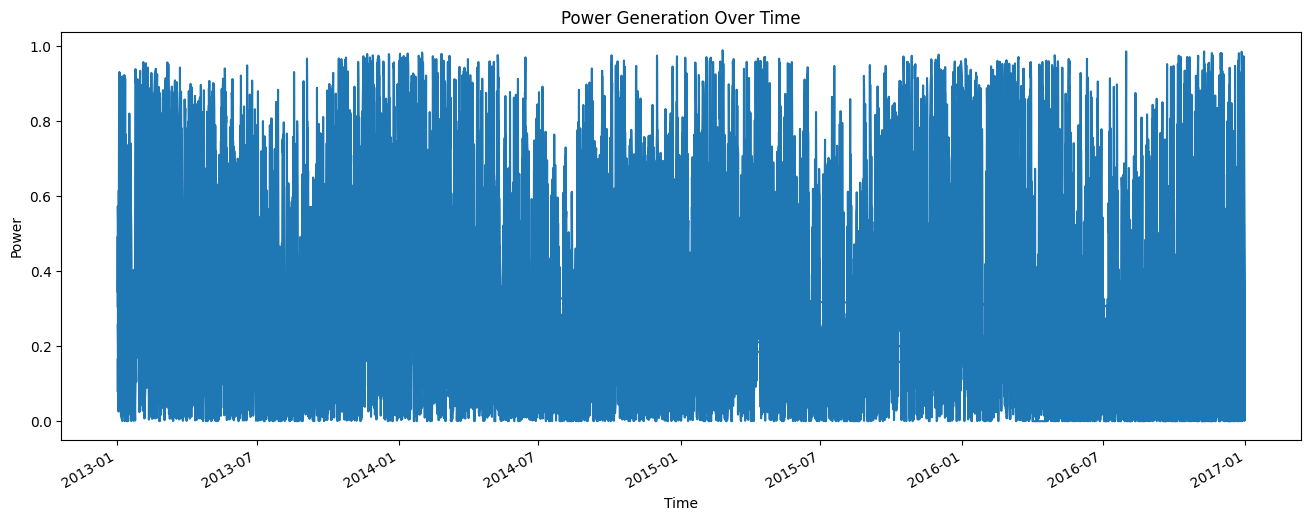

In [7]:
plt.figure(figsize=(16, 6))
df_train.set_index('Time')['Power'].plot()
plt.title('Power Generation Over Time')
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

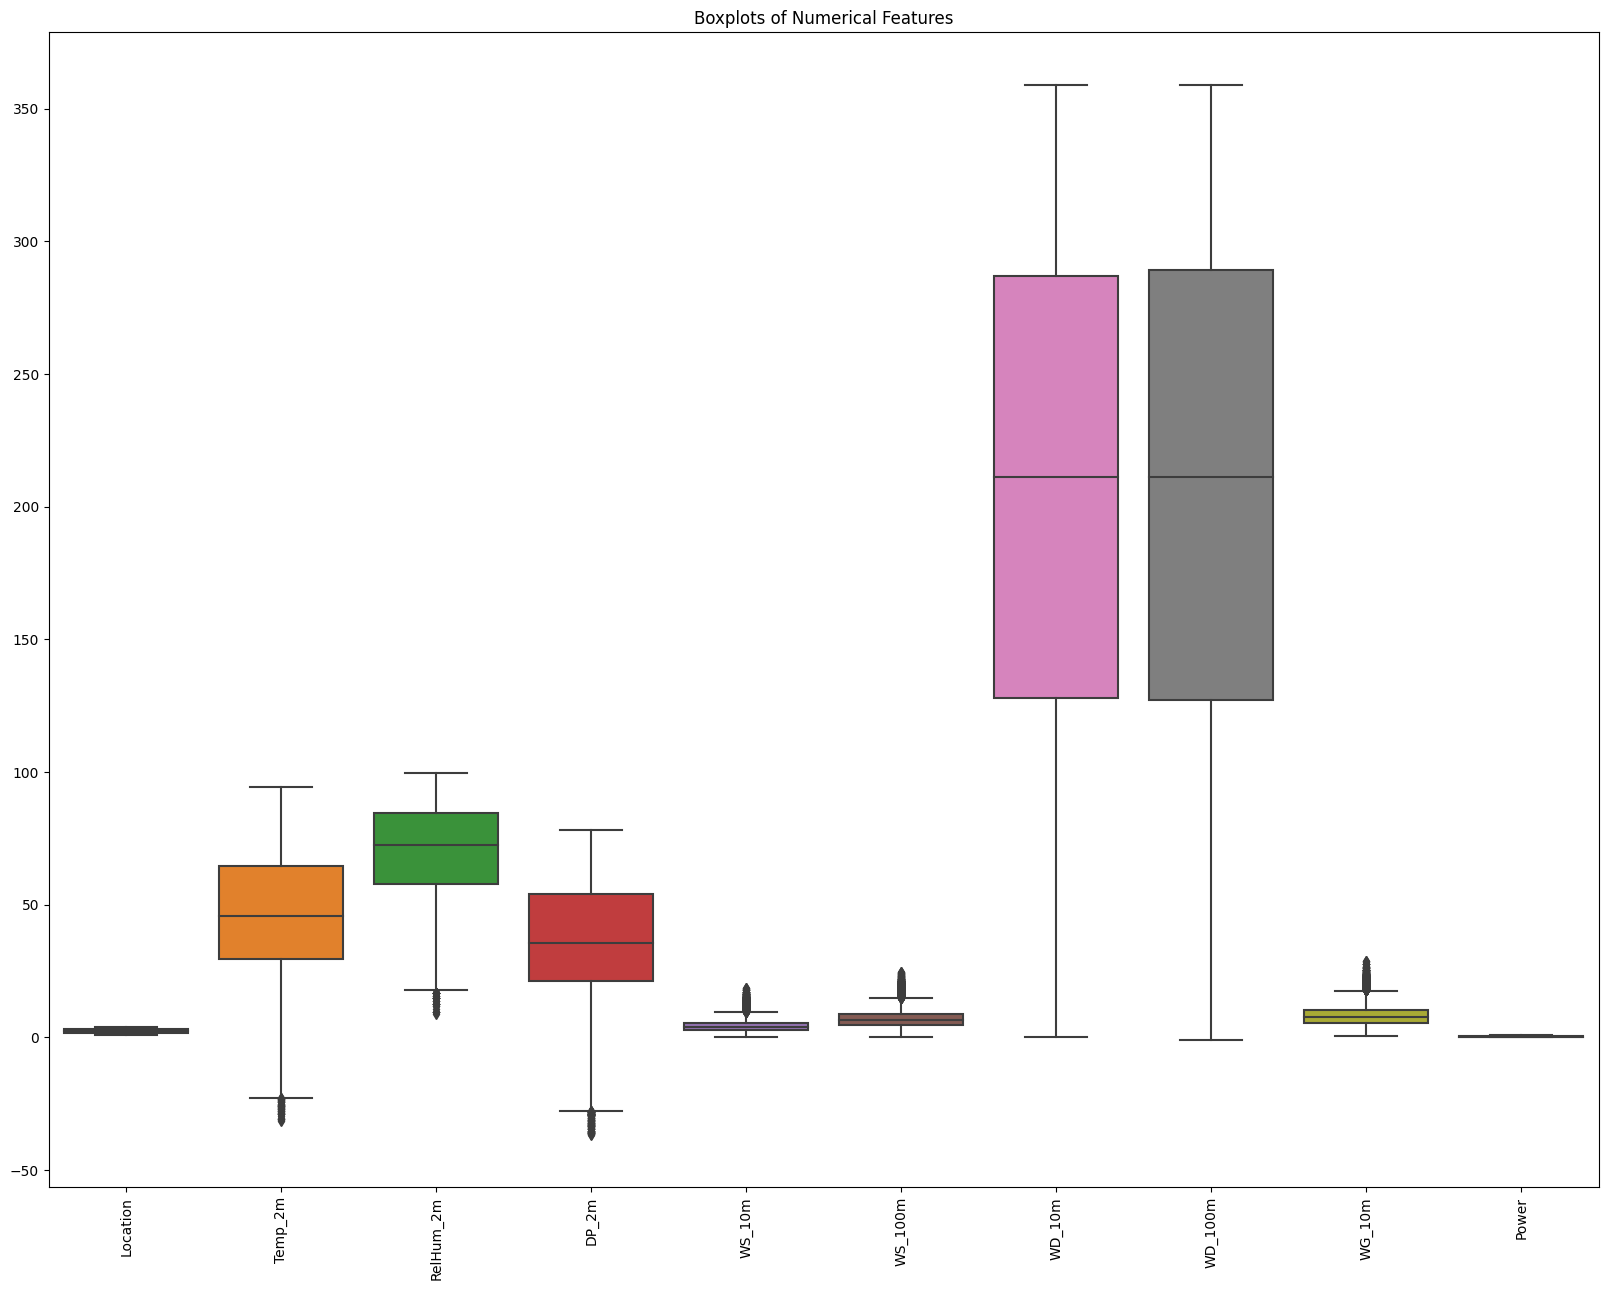

In [8]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_train.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Features')
plt.show()


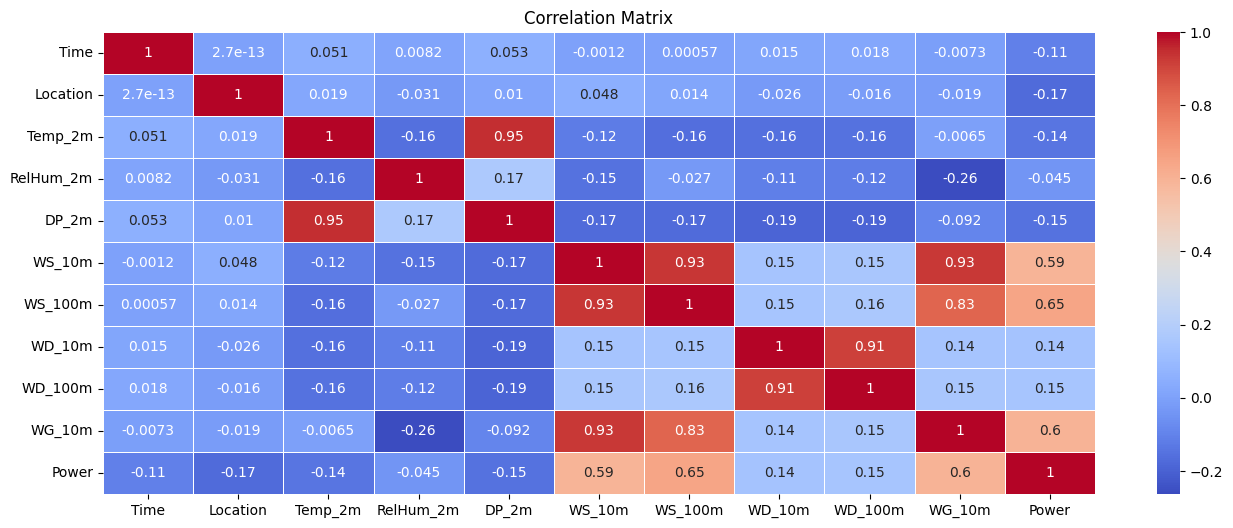

In [9]:
plt.figure(figsize=(16, 6))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


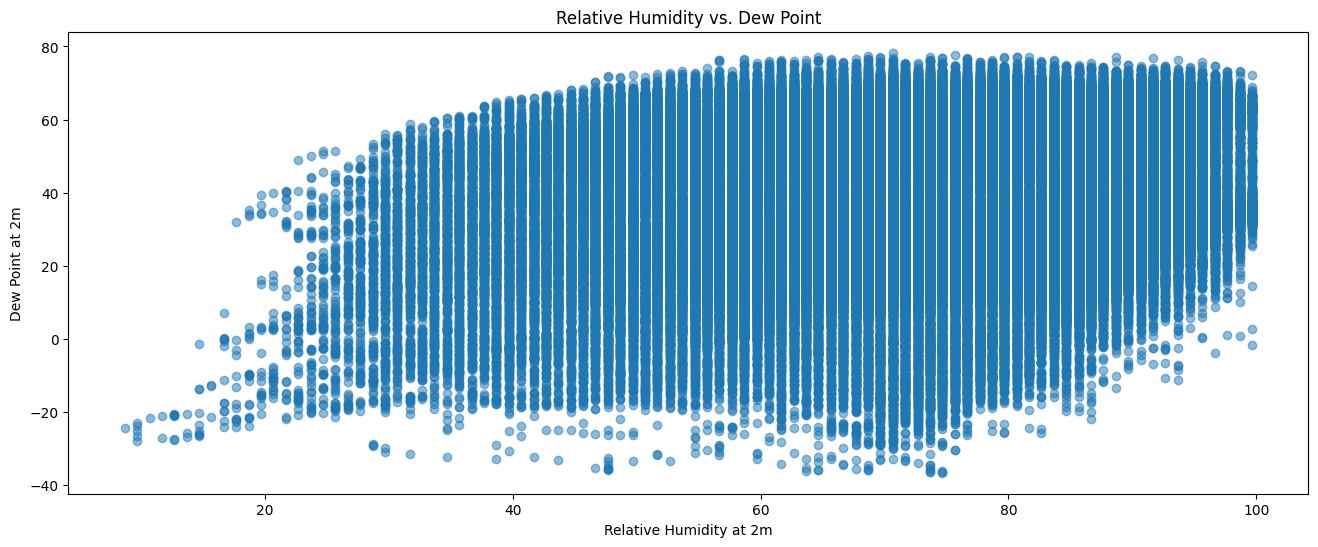

In [10]:
plt.figure(figsize=(16, 6))
plt.scatter(df_train['RelHum_2m'], df_train['DP_2m'], alpha=0.5)
plt.title('Relative Humidity vs. Dew Point')
plt.xlabel('Relative Humidity at 2m')
plt.ylabel('Dew Point at 2m')
plt.show()

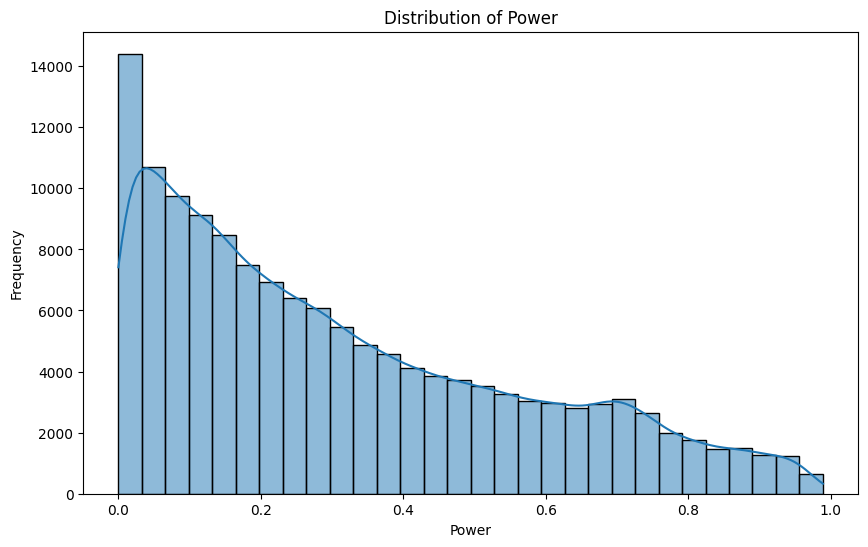

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Power'], bins=30, kde=True)
plt.title('Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

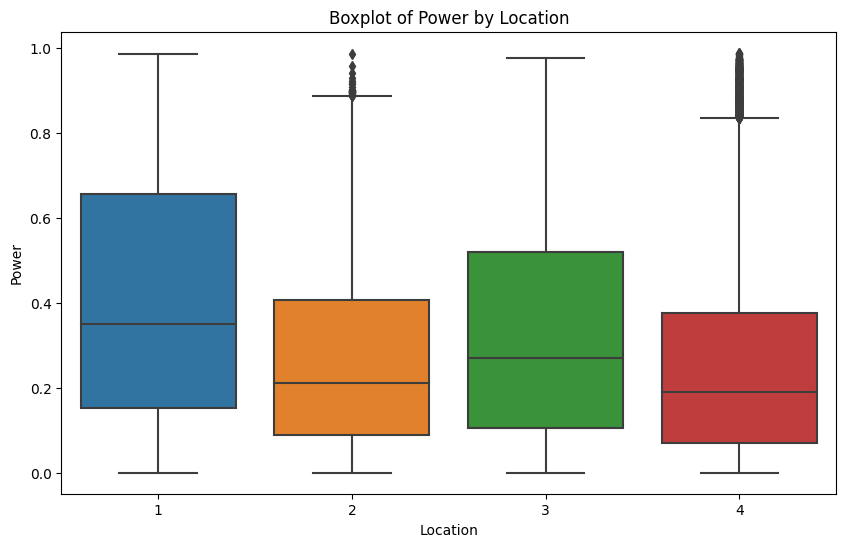

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Power', data=df_train)
plt.title('Boxplot of Power by Location')
plt.xlabel('Location')
plt.ylabel('Power')
plt.show()

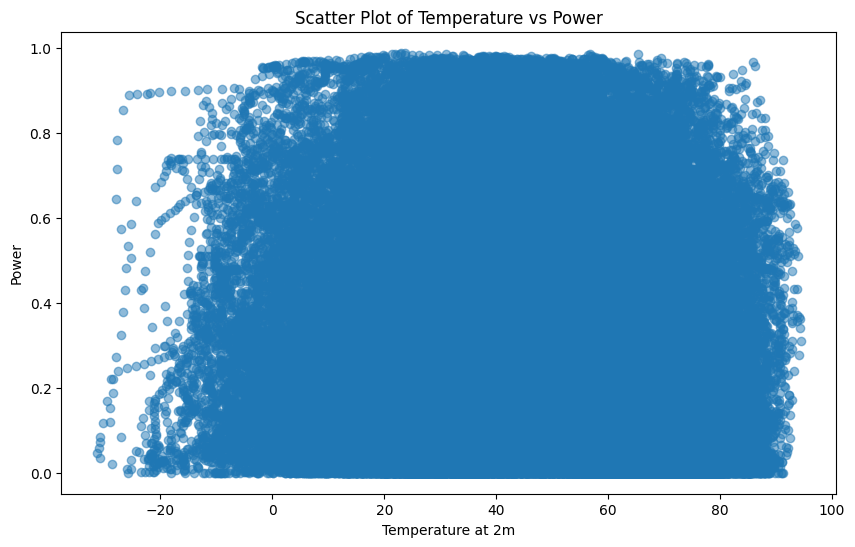

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Temp_2m'], df_train['Power'], alpha=0.5)
plt.title('Scatter Plot of Temperature vs Power')
plt.xlabel('Temperature at 2m')
plt.ylabel('Power')
plt.show()

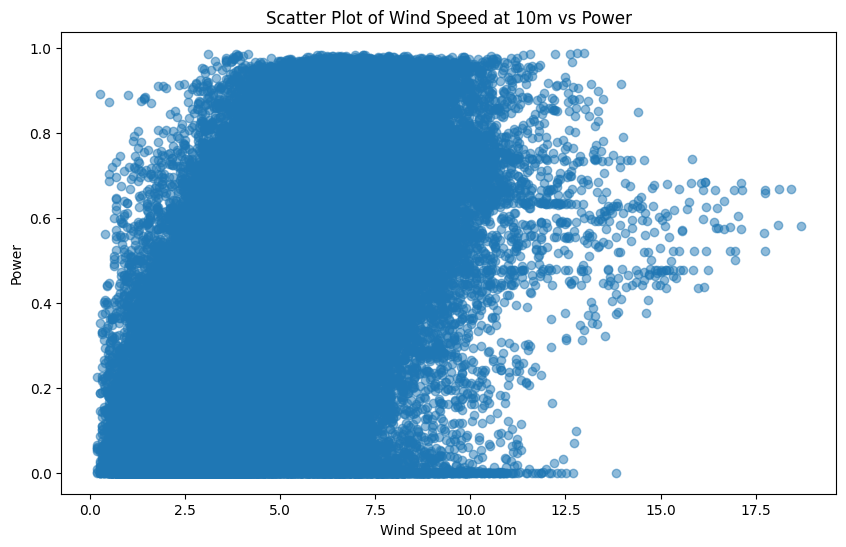

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['WS_10m'], df_train['Power'], alpha=0.5)
plt.title('Scatter Plot of Wind Speed at 10m vs Power')
plt.xlabel('Wind Speed at 10m')
plt.ylabel('Power')
plt.show()

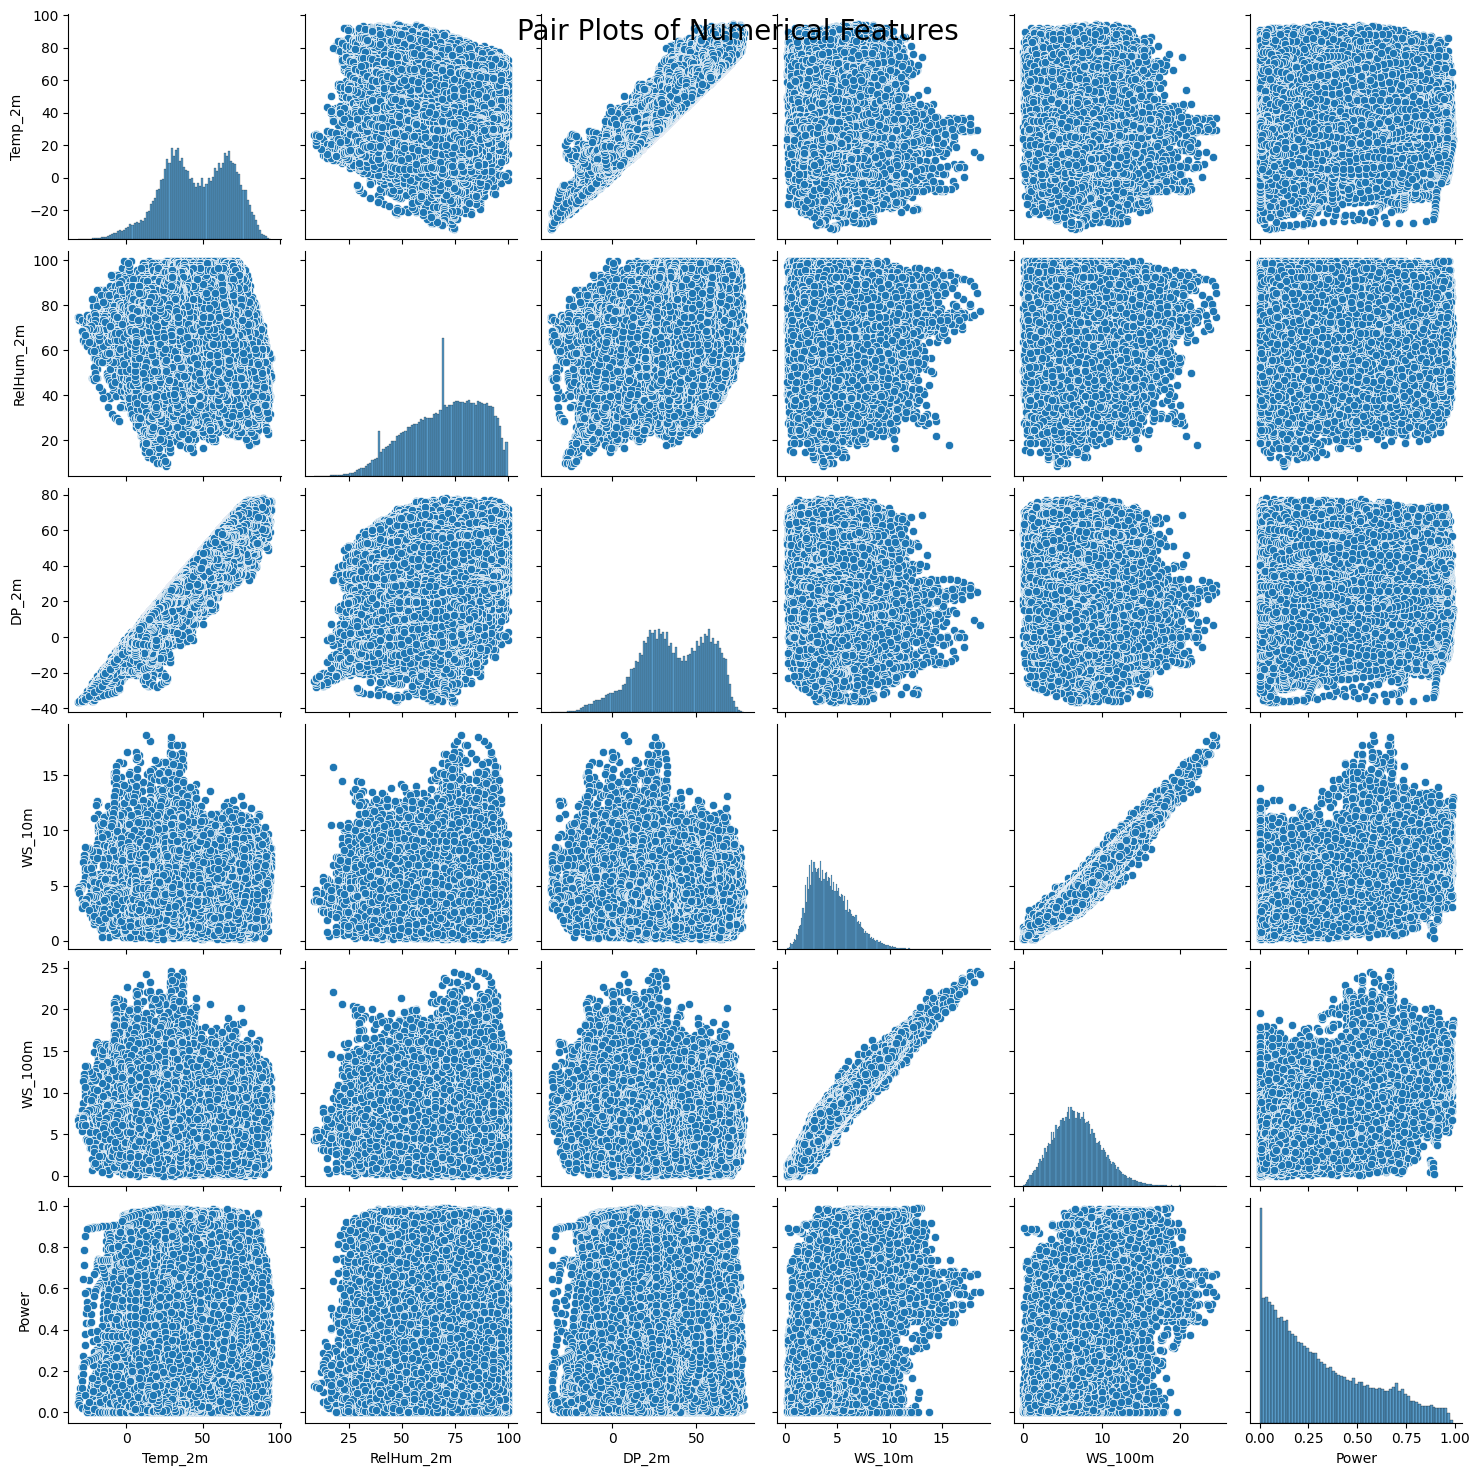

In [15]:
sns.pairplot(df_train[['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'Power']])
plt.suptitle('Pair Plots of Numerical Features', size=20)
plt.show()

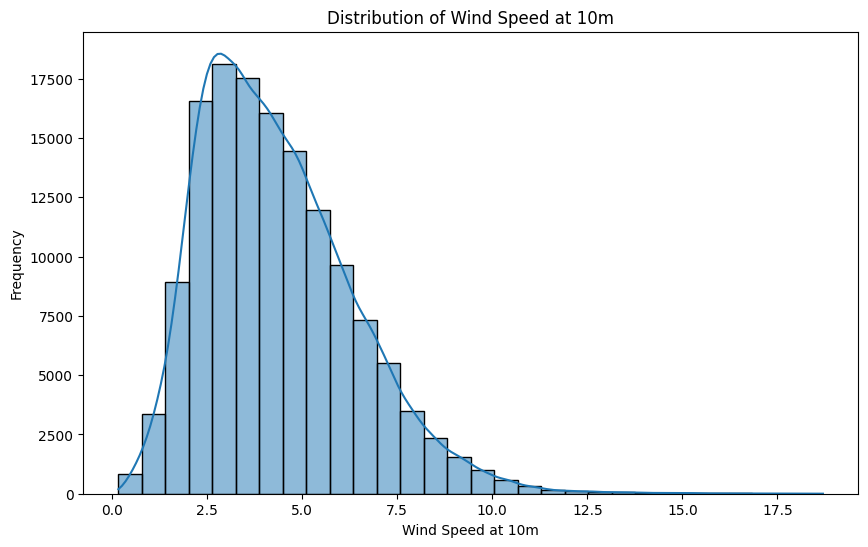

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['WS_10m'], bins=30, kde=True)
plt.title('Distribution of Wind Speed at 10m')
plt.xlabel('Wind Speed at 10m')
plt.ylabel('Frequency')
plt.show()

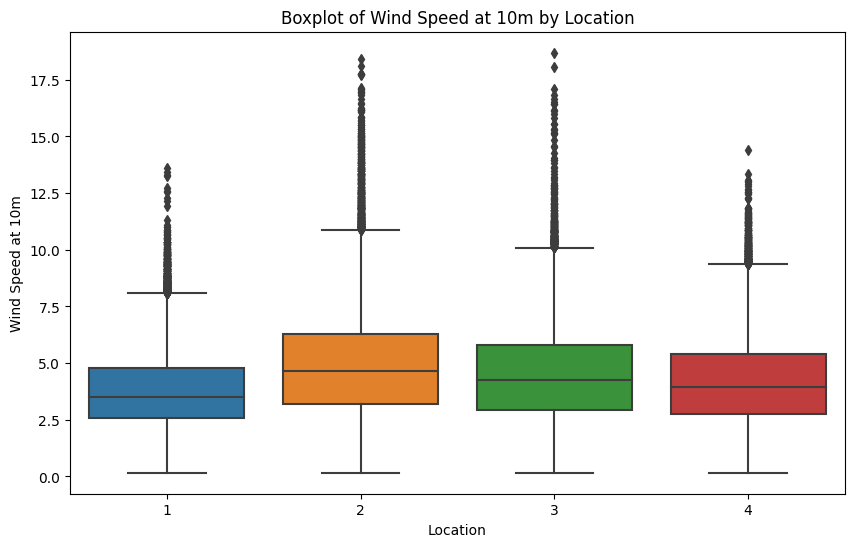

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='WS_10m', data=df_train)
plt.title('Boxplot of Wind Speed at 10m by Location')
plt.xlabel('Location')
plt.ylabel('Wind Speed at 10m')
plt.show()

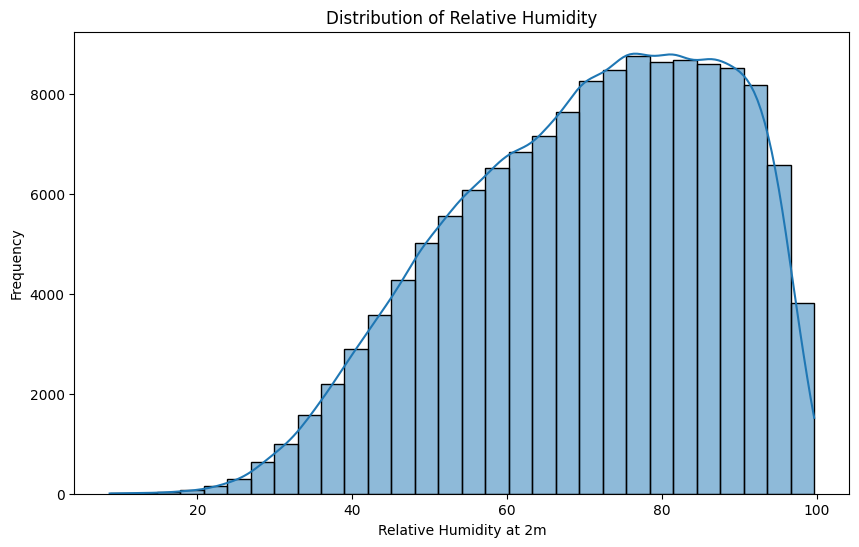

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['RelHum_2m'], bins=30, kde=True)
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity at 2m')
plt.ylabel('Frequency')
plt.show()

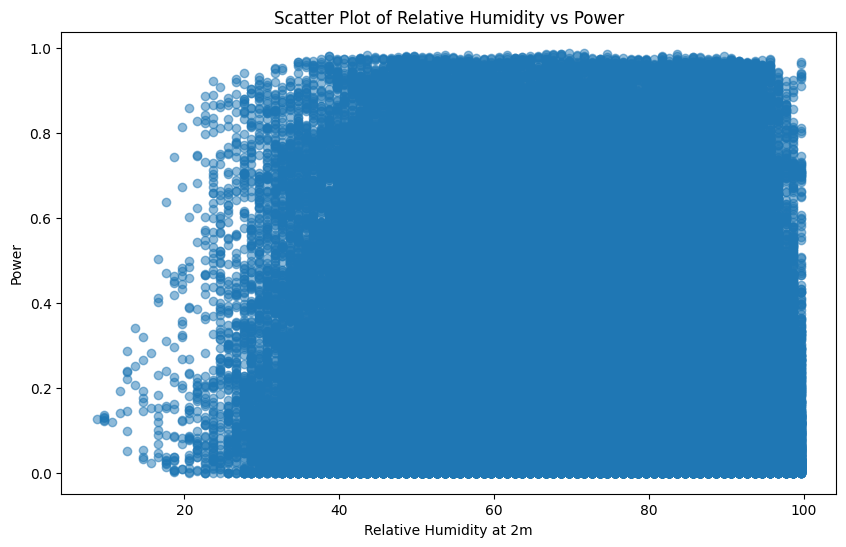

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['RelHum_2m'], df_train['Power'], alpha=0.5)
plt.title('Scatter Plot of Relative Humidity vs Power')
plt.xlabel('Relative Humidity at 2m')
plt.ylabel('Power')
plt.show()

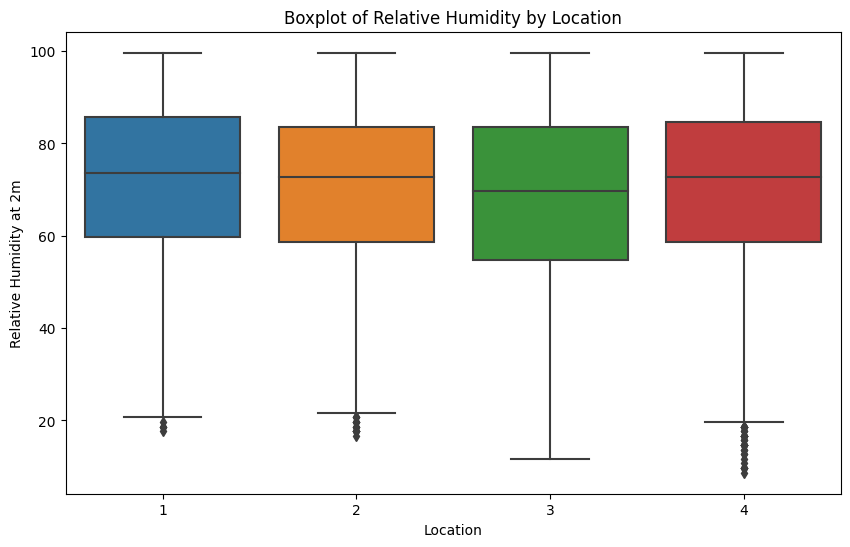

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='RelHum_2m', data=df_train)
plt.title('Boxplot of Relative Humidity by Location')
plt.xlabel('Location')
plt.ylabel('Relative Humidity at 2m')
plt.show()

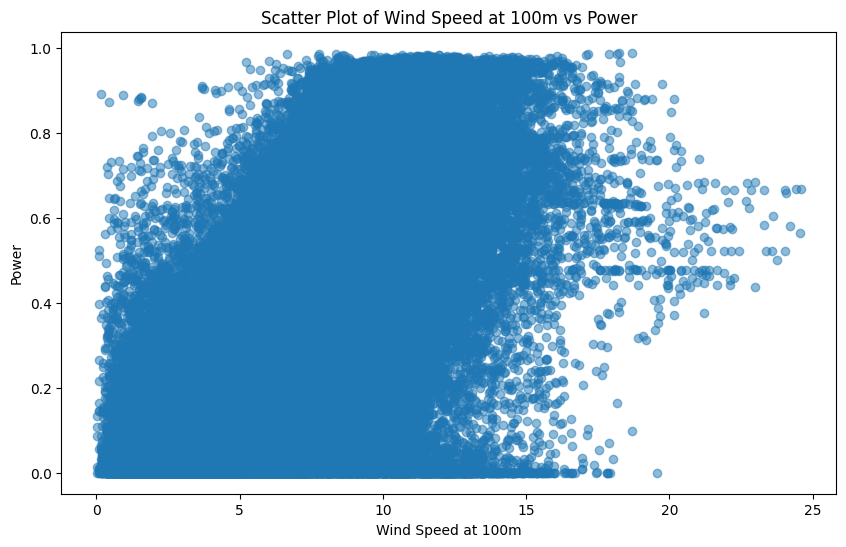

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['WS_100m'], df_train['Power'], alpha=0.5)
plt.title('Scatter Plot of Wind Speed at 100m vs Power')
plt.xlabel('Wind Speed at 100m')
plt.ylabel('Power')
plt.show()

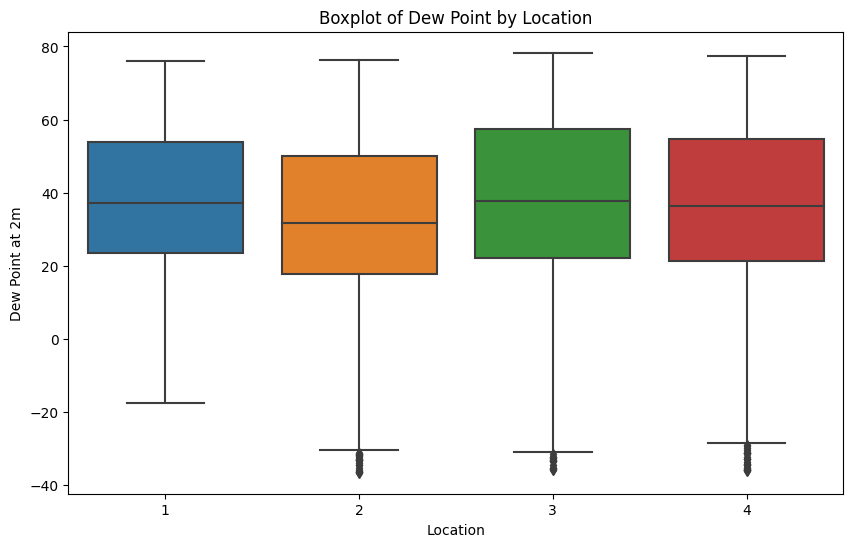

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='DP_2m', data=df_train)
plt.title('Boxplot of Dew Point by Location')
plt.xlabel('Location')
plt.ylabel('Dew Point at 2m')
plt.show()


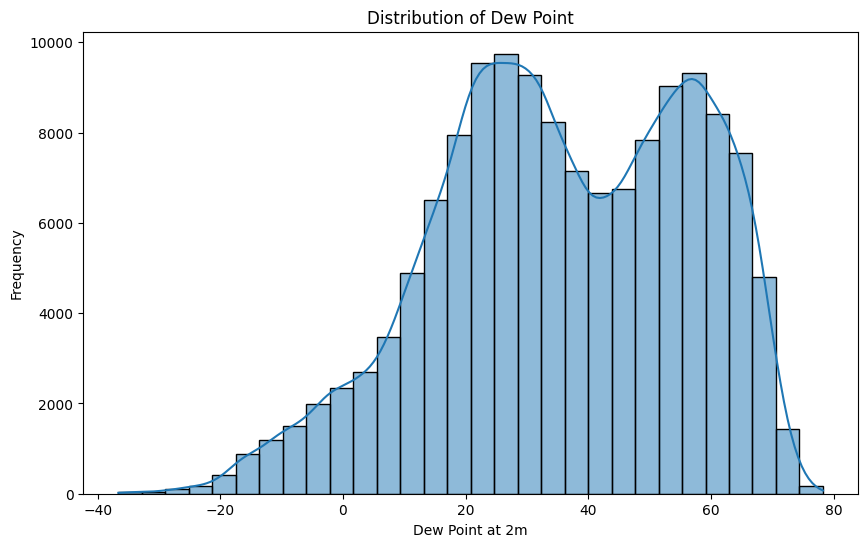

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['DP_2m'], bins=30, kde=True)
plt.title('Distribution of Dew Point')
plt.xlabel('Dew Point at 2m')
plt.ylabel('Frequency')
plt.show()

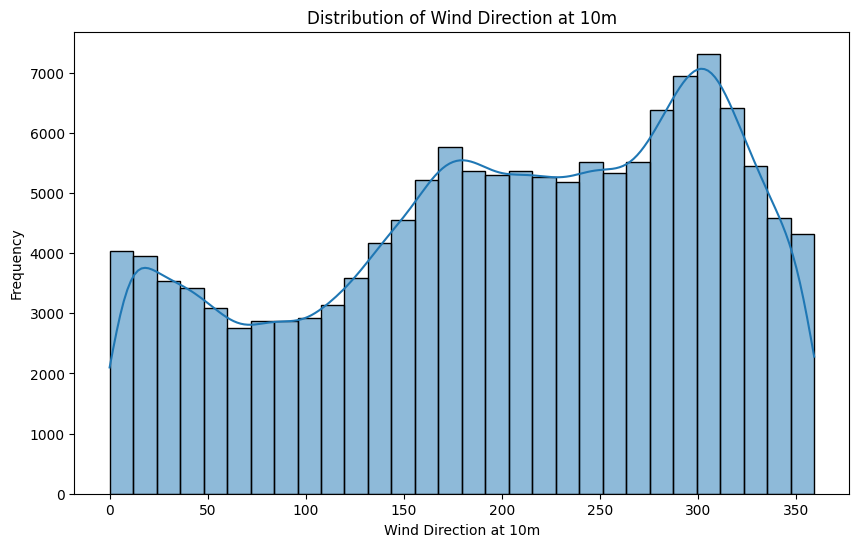

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['WD_10m'], bins=30, kde=True)
plt.title('Distribution of Wind Direction at 10m')
plt.xlabel('Wind Direction at 10m')
plt.ylabel('Frequency')
plt.show()

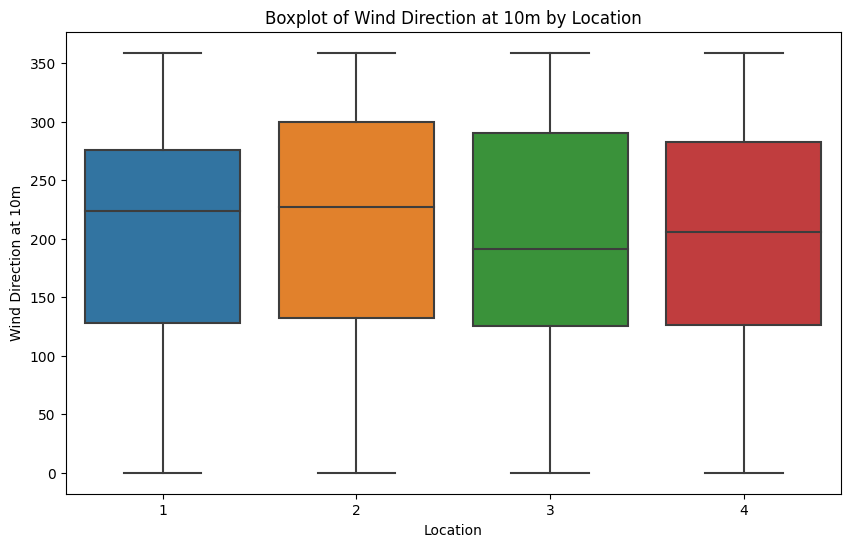

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='WD_10m', data=df_train)
plt.title('Boxplot of Wind Direction at 10m by Location')
plt.xlabel('Location')
plt.ylabel('Wind Direction at 10m')
plt.show()

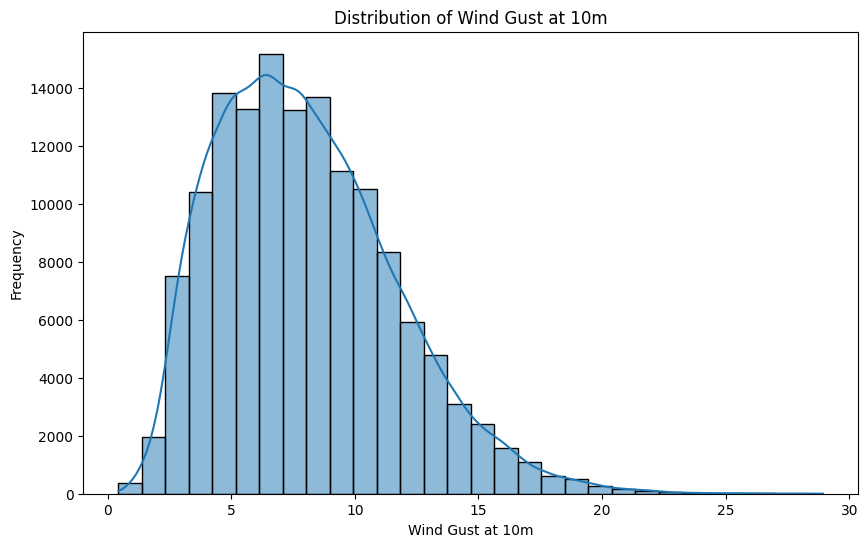

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['WG_10m'], bins=30, kde=True)
plt.title('Distribution of Wind Gust at 10m')
plt.xlabel('Wind Gust at 10m')
plt.ylabel('Frequency')
plt.show()


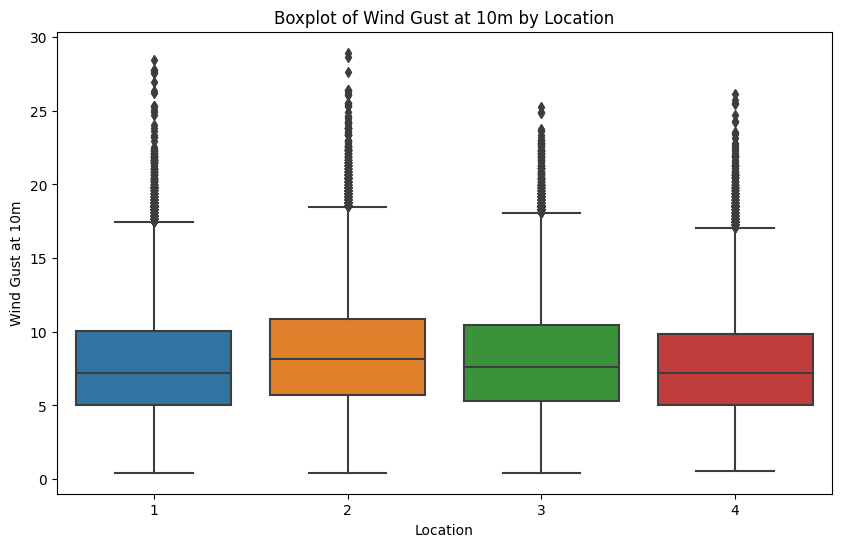

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='WG_10m', data=df_train)
plt.title('Boxplot of Wind Gust at 10m by Location')
plt.xlabel('Location')
plt.ylabel('Wind Gust at 10m')
plt.show()

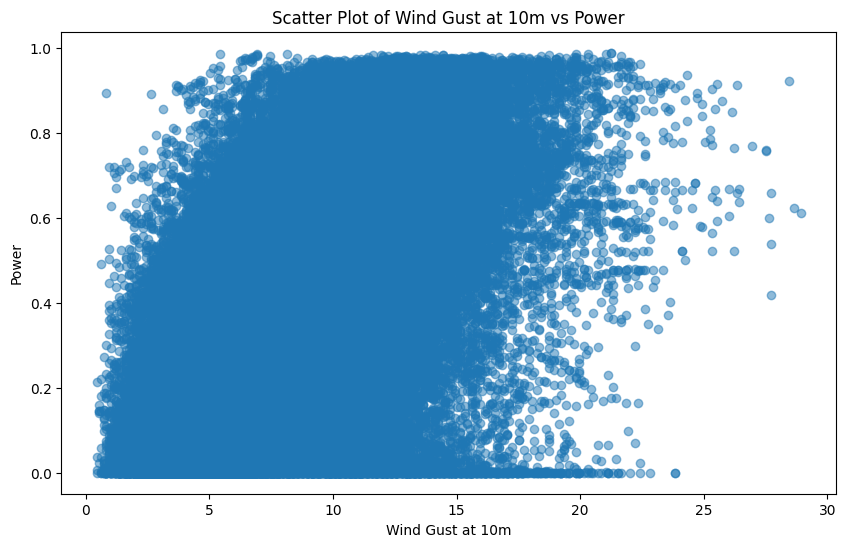

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['WG_10m'], df_train['Power'], alpha=0.5)
plt.title('Scatter Plot of Wind Gust at 10m vs Power')
plt.xlabel('Wind Gust at 10m')
plt.ylabel('Power')
plt.show()

# **Models**

Epoch 1/300


I0000 00:00:1726574471.672700      70 service.cc:145] XLA service 0x7f4750003c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726574471.672776      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 107/3154 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0968

I0000 00:00:1726574474.989716      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3154/3154 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0383 - val_loss: 0.0273
Epoch 2/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0274 - val_loss: 0.0268
Epoch 3/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0262 - val_loss: 0.0249
Epoch 4/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 5/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0258 - val_loss: 0.0246
Epoch 6/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0256 - val_loss: 0.0241
Epoch 7/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 8/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0256 - val_loss: 0.0243
Epoch 9/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0254 - val_loss: 0.0247
Epoch 10/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0255 - val_loss: 0.0245
Epoch 11/300
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0252 - val_loss: 0.0241
Epoch 12/300
3154/3154 ━━━━━━━

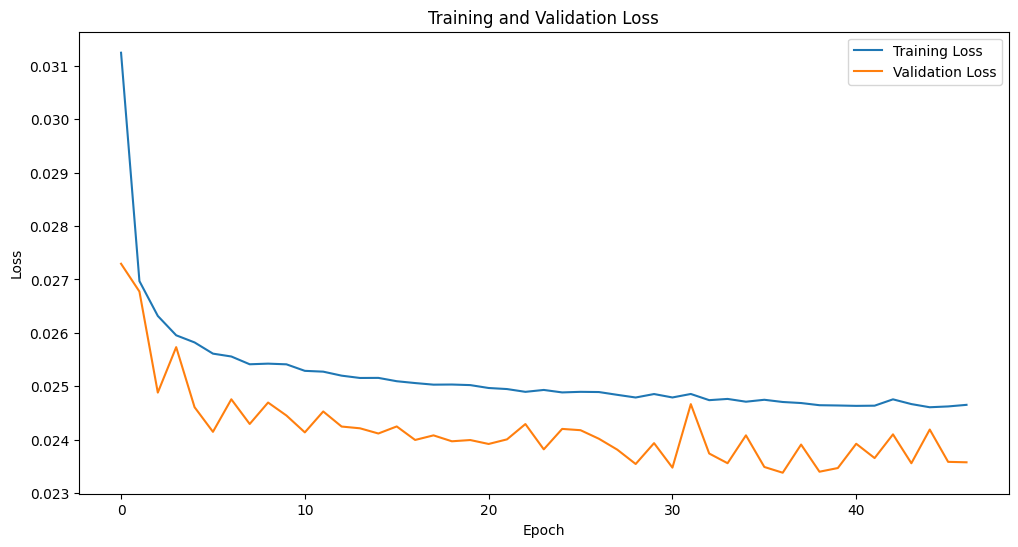

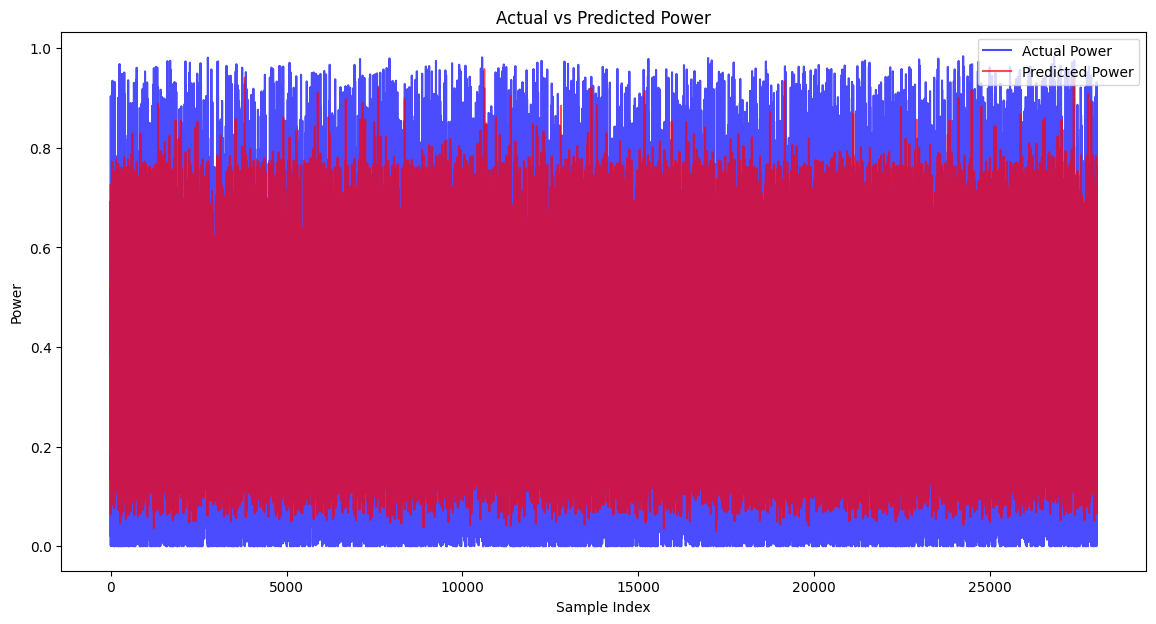

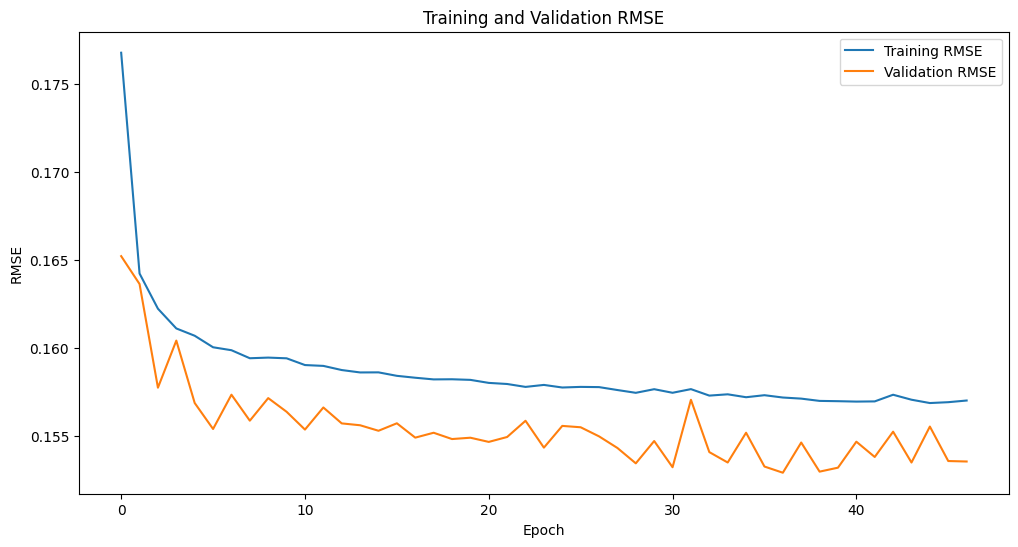

In [29]:

features = df_train.drop(columns=['Time', 'Power'])
target = df_train['Power']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.1, 
                    verbose=1, callbacks=[early_stopping])


y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Neural Network Mean Squared Error: {mse}')
print(f'Neural Network Root Mean Squared Error: {rmse}')
print(f'Neural Network R^2 Score: {r2}')


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Power', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Power', color='red', alpha=0.7)
plt.title('Actual vs Predicted Power')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(np.sqrt(history.history['loss']), label='Training RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Random Forest Mean Squared Error: 0.02015483595385753
Random Forest Root Mean Squared Error: 0.141967728564831
Random Forest R^2 Score: 0.6865827559580637


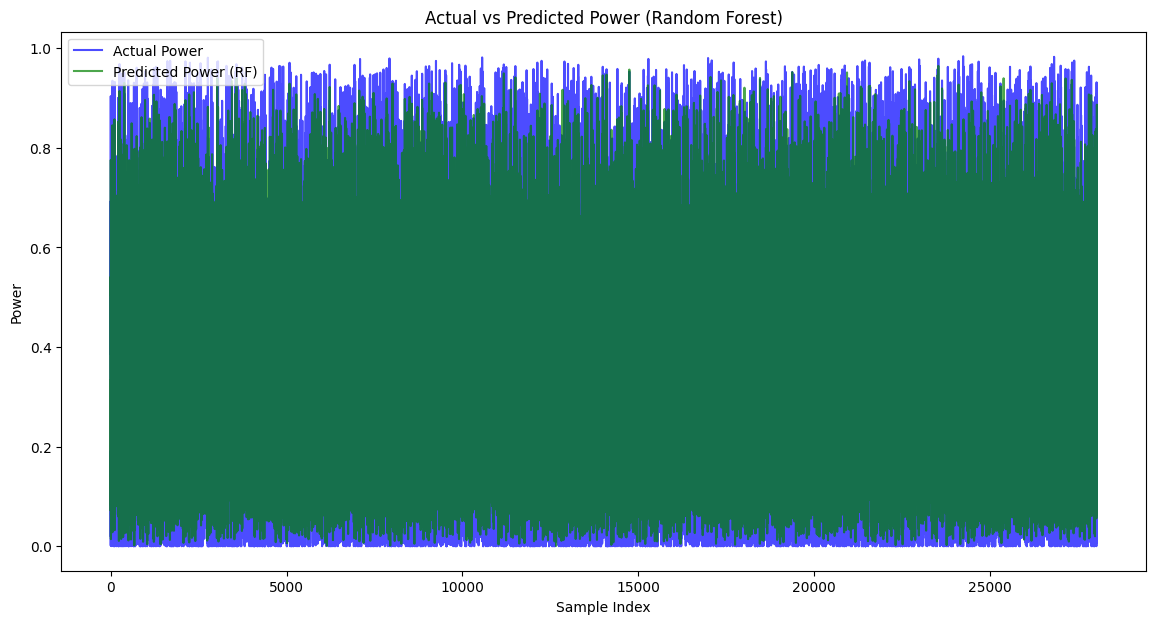

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')
print(f'Random Forest R^2 Score: {rf_r2}')


plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Power', color='blue', alpha=0.7)
plt.plot(rf_pred, label='Predicted Power (RF)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Power (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.show()


Gradient Boosting Mean Squared Error: 0.02519536022373635
Gradient Boosting Root Mean Squared Error: 0.15873046406955518
Gradient Boosting R^2 Score: 0.6082002164619014


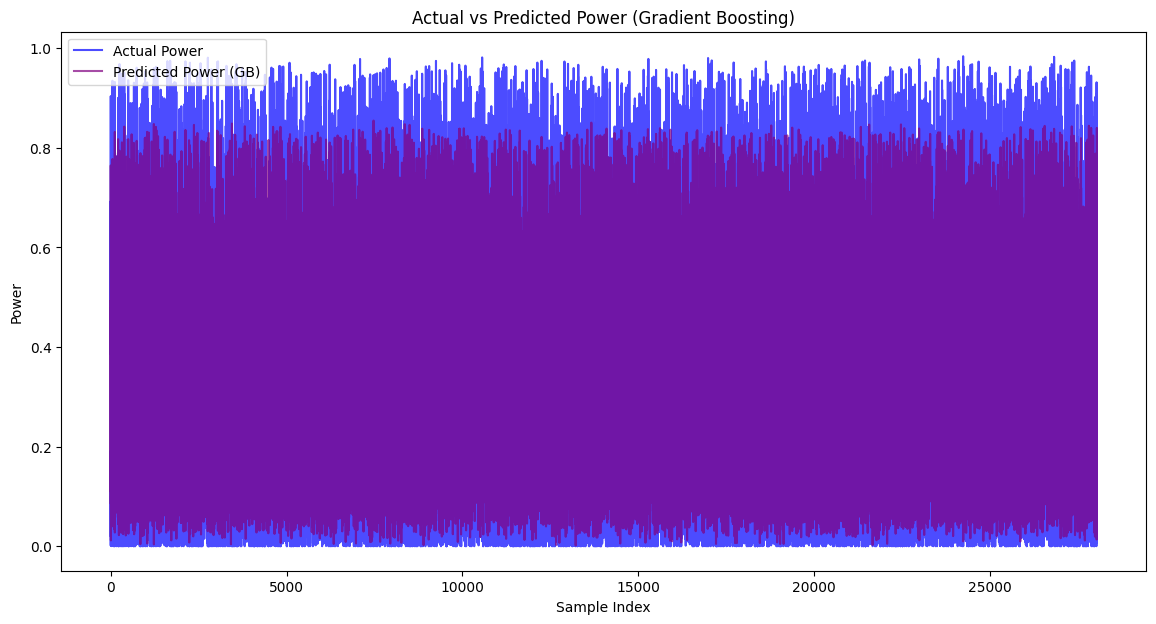

In [31]:
# gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)

print(f'Gradient Boosting Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting Root Mean Squared Error: {gb_rmse}')
print(f'Gradient Boosting R^2 Score: {gb_r2}')


plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Power', color='blue', alpha=0.7)
plt.plot(gb_pred, label='Predicted Power (GB)', color='purple', alpha=0.7)
plt.title('Actual vs Predicted Power (Gradient Boosting)')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.show()


<div style="text-align: center; border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
    <h2>🙏 Thank You! 🙏</h2>
    <p>If you like my work, please upvote so I can contribute more 😊</p>
</div>
